# Scraping the manifesto 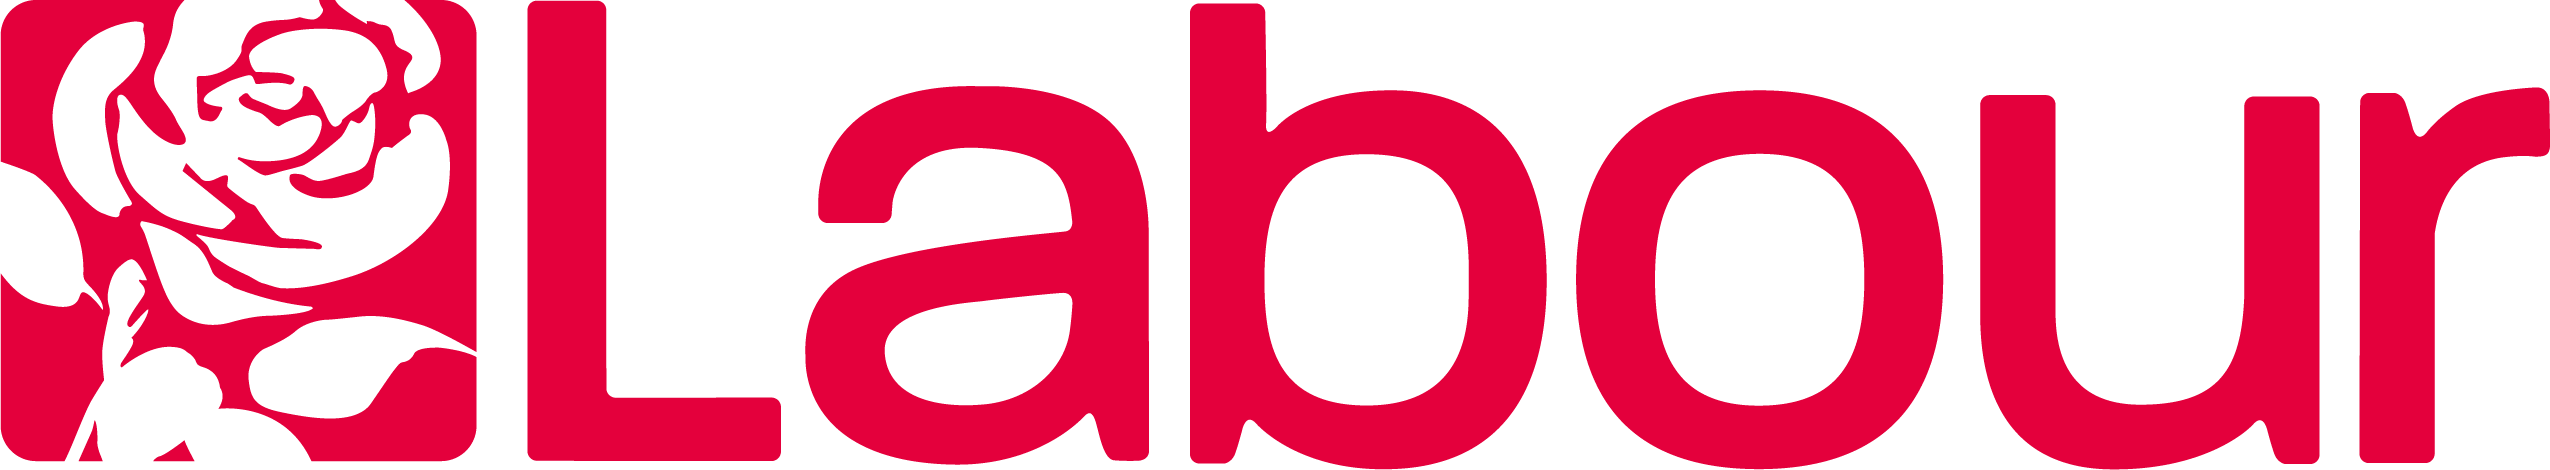 
 

## Imports 💼 

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import string
from sklearn.feature_extraction.text import CountVectorizer

## Scraping Labour's Plan

### Create soup 🍲


In [2]:
plan_url = 'https://labour.org.uk/change/my-plan-for-change/'
response = requests.get(plan_url)
print(response)
soup = BeautifulSoup(response.content, 'html.parser')

<Response [200]>


### Parse soup for plan text 🕵️

In [3]:
plan_scraped = soup.find_all('div', class_='wp-block-group')
plan_text_list = [line.text for line in plan_scraped]
plan_text = ''
for text in plan_text_list:
    plan_text += text 
plan_text

'\nThis election is about change.\nA chance to stop the endless Conservative chaos that has directly harmed the finances of every family in Britain.\nA moment where we can turn the page on a set of ideas that, over 14 years, have consistently left us more vulnerable in an increasingly volatile world.\nAnd an opportunity to begin the work of national renewal. A rebuilding of our country, so that it once again serves the interests of working people.\n\nEvery great nation is held together by shared beliefs. To outsiders they may not seem exceptional or distinctive, but they are essential for a sense of collective national purpose. Britain is no different, but at this moment two of our most important beliefs are in grave danger.\nFirst, that politics should be driven by a sense of service to the country, not considerations of party or self-interest.\nSecond, that if you work hard then – whoever you are, wherever you started in life – Britain is a country that will respect your contribution

# Cleaning the Plan text 🧹🚮

## Remove `\n` from plan text

In [4]:
plan_text = plan_text.replace('\n', '')

## Convert text to lower case using `.lower()` 

In [5]:
plan_text = plan_text.lower()

## Remove numbers from text using the `.isdigit()` method

In [6]:
numberless_plan_text = ''.join(char for char in plan_text if not char.isdigit())
numberless_plan_text

'this election is about change.a chance to stop the endless conservative chaos that has directly harmed the finances of every family in britain.a moment where we can turn the page on a set of ideas that, over  years, have consistently left us more vulnerable in an increasingly volatile world.and an opportunity to begin the work of national renewal. a rebuilding of our country, so that it once again serves the interests of working people.every great nation is held together by shared beliefs. to outsiders they may not seem exceptional or distinctive, but they are essential for a sense of collective national purpose. britain is no different, but at this moment two of our most important beliefs are in grave danger.first, that politics should be driven by a sense of service to the country, not considerations of party or self-interest.second, that if you work hard then – whoever you are, wherever you started in life – britain is a country that will respect your contribution and give you a fa

## Remove punctuation and symbols using  the `string.punctuation` method 

In [7]:
for punctuation in string.punctuation:
    cleaned_text = numberless_plan_text.replace(punctuation, '')
cleaned_text

'this election is about change.a chance to stop the endless conservative chaos that has directly harmed the finances of every family in britain.a moment where we can turn the page on a set of ideas that, over  years, have consistently left us more vulnerable in an increasingly volatile world.and an opportunity to begin the work of national renewal. a rebuilding of our country, so that it once again serves the interests of working people.every great nation is held together by shared beliefs. to outsiders they may not seem exceptional or distinctive, but they are essential for a sense of collective national purpose. britain is no different, but at this moment two of our most important beliefs are in grave danger.first, that politics should be driven by a sense of service to the country, not considerations of party or self-interest.second, that if you work hard then – whoever you are, wherever you started in life – britain is a country that will respect your contribution and give you a fa

## Hmm... that didn't quite work 🤔
Ok, removing all of the punctuation has been unsuccessful (not all of the en-dashes – and em-dashes — have been removed). Consulting my 🐥 (a.k.a. Chat GPT <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/04/ChatGPT_logo.svg/120px-ChatGPT_logo.svg.png" width="15" style="display: inline; vertical-align: middle;"/>), I was able to discover an alternative approach using the `str.translate` and `str.maketrans` methods.

### `str.translate`
The `str.translate` method returns a copy of the string in which each character has been mapped through the given translation table. This method is useful for replacing or deleting characters in a string.

📚 Read the docs [here](https://docs.python.org/3/library/stdtypes.html#str.translate)

### `str.maketrans`
The `str.maketrans` method is used to create a translation table for `str.translate`. It can be used in three different ways:
<ol>
    <li>Mapping one character to another: You can map each character in one string to a corresponding character in another string.</li>
    <li>Mapping characters to None (deletion): You can specify characters that should be deleted.</li>
    <li>Using a dictionary: You can pass a dictionary where keys are characters to be replaced, and values are characters to replace them with.</li>
</ol>

📚 Read the docs [here](https://docs.python.org/3/library/stdtypes.html#str.maketrans)

## Create a function to do the cleaning 

In [8]:
def clean_text(text): 
    '''Takes the text from a BeautifulSoup and:
        1. Removes all instances of `\n`.
        2. Converts the text to lower case.
        3. Removes all numbers from the text.
        4. Removes punctuation from the text.
        5. Returns cleaned_text
    '''
    text = text.replace('\n', '') # Removes all instances of '\n' from the text 
    text = text.lower() # Converts text to lower case
    text = text.replace('–', '').replace('—', '').replace('-', '')  # Removes both types of dashes 
    numberless_text = ''.join(char for char in text if not char.isdigit()) # Removes digits 
    cleaned_text = numberless_text.translate(str.maketrans('', '', string.punctuation)) # Removes punctuation
    cleaned_text = cleaned_text.strip() # Removes whitespace
    return cleaned_text

# Clean the plan_text
cleaned_plan_text = clean_text(plan_text)
print(cleaned_plan_text)

this election is about changea chance to stop the endless conservative chaos that has directly harmed the finances of every family in britaina moment where we can turn the page on a set of ideas that over  years have consistently left us more vulnerable in an increasingly volatile worldand an opportunity to begin the work of national renewal a rebuilding of our country so that it once again serves the interests of working peopleevery great nation is held together by shared beliefs to outsiders they may not seem exceptional or distinctive but they are essential for a sense of collective national purpose britain is no different but at this moment two of our most important beliefs are in grave dangerfirst that politics should be driven by a sense of service to the country not considerations of party or selfinterestsecond that if you work hard then  whoever you are wherever you started in life  britain is a country that will respect your contribution and give you a fair chance to get onwhe

## Tokenize the plan 

In [9]:
from nltk.tokenize import word_tokenize

In [10]:
word_tokens = word_tokenize(cleaned_plan_text)
word_tokens

['this',
 'election',
 'is',
 'about',
 'changea',
 'chance',
 'to',
 'stop',
 'the',
 'endless',
 'conservative',
 'chaos',
 'that',
 'has',
 'directly',
 'harmed',
 'the',
 'finances',
 'of',
 'every',
 'family',
 'in',
 'britaina',
 'moment',
 'where',
 'we',
 'can',
 'turn',
 'the',
 'page',
 'on',
 'a',
 'set',
 'of',
 'ideas',
 'that',
 'over',
 'years',
 'have',
 'consistently',
 'left',
 'us',
 'more',
 'vulnerable',
 'in',
 'an',
 'increasingly',
 'volatile',
 'worldand',
 'an',
 'opportunity',
 'to',
 'begin',
 'the',
 'work',
 'of',
 'national',
 'renewal',
 'a',
 'rebuilding',
 'of',
 'our',
 'country',
 'so',
 'that',
 'it',
 'once',
 'again',
 'serves',
 'the',
 'interests',
 'of',
 'working',
 'peopleevery',
 'great',
 'nation',
 'is',
 'held',
 'together',
 'by',
 'shared',
 'beliefs',
 'to',
 'outsiders',
 'they',
 'may',
 'not',
 'seem',
 'exceptional',
 'or',
 'distinctive',
 'but',
 'they',
 'are',
 'essential',
 'for',
 'a',
 'sense',
 'of',
 'collective',
 'nation

## Lemmatize Tokens

In [11]:
from nltk.stem import WordNetLemmatizer

In [12]:
# Lemmatizing the verbs
verb_lemmatized = [
    WordNetLemmatizer().lemmatize(word, pos = "v") for word in word_tokens
]

# 2 - Lemmatizing the nouns
noun_lemmatized = [
    WordNetLemmatizer().lemmatize(word, pos = "n") for word in verb_lemmatized
]

In [18]:
# Tokenize the text
word_tokens = word_tokenize(cleaned_plan_text)

# Initialize WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize each word with the appropriate POS tag
lemmatized_tokens = []
for word in word_tokens:
    # Lemmatize verbs (pos='v') and nouns (pos='n')
    lemma = lemmatizer.lemmatize(word, pos='v')  # Verb
    lemma = lemmatizer.lemmatize(lemma, pos='n')  # Noun
    lemmatized_tokens.append(lemma)

# Vectorizing the text 

In [19]:
lemmatized_tokens

['this',
 'election',
 'be',
 'about',
 'changea',
 'chance',
 'to',
 'stop',
 'the',
 'endless',
 'conservative',
 'chaos',
 'that',
 'have',
 'directly',
 'harm',
 'the',
 'finance',
 'of',
 'every',
 'family',
 'in',
 'britaina',
 'moment',
 'where',
 'we',
 'can',
 'turn',
 'the',
 'page',
 'on',
 'a',
 'set',
 'of',
 'idea',
 'that',
 'over',
 'year',
 'have',
 'consistently',
 'leave',
 'u',
 'more',
 'vulnerable',
 'in',
 'an',
 'increasingly',
 'volatile',
 'worldand',
 'an',
 'opportunity',
 'to',
 'begin',
 'the',
 'work',
 'of',
 'national',
 'renewal',
 'a',
 'rebuild',
 'of',
 'our',
 'country',
 'so',
 'that',
 'it',
 'once',
 'again',
 'serve',
 'the',
 'interest',
 'of',
 'work',
 'peopleevery',
 'great',
 'nation',
 'be',
 'hold',
 'together',
 'by',
 'share',
 'belief',
 'to',
 'outsider',
 'they',
 'may',
 'not',
 'seem',
 'exceptional',
 'or',
 'distinctive',
 'but',
 'they',
 'be',
 'essential',
 'for',
 'a',
 'sense',
 'of',
 'collective',
 'national',
 'purpose',

In [15]:
# Join tokens into a single document (sentence)
document = ' '.join(lemmatized_tokens)

# Create CountVectorizer instance
count_vectorizer = CountVectorizer()

# Fit and transform the document
X = count_vectorizer.fit_transform([document])

# Convert the matrix to array for inspection
X_array = X.toarray()

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# Instantiating the TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer()

# Training it on the text
weighted_words = pd.DataFrame(tf_idf_vectorizer.fit_transform([document]).toarray(),
                              columns=tf_idf_vectorizer.get_feature_names_out())

# Print the dataframe
weighted_words

,able,about,above,accident,achieve,ae,affect,after,again,age,...,will,with,work,world,worldand,would,year,yet,you,your
0,0.009361,0.018723,0.009361,0.009361,0.018723,0.009361,0.009361,0.009361,0.028084,0.009361,...,0.056168,0.065529,0.084252,0.018723,0.009361,0.009361,0.046807,0.009361,0.084252,0.028084


In [21]:
from sklearn.decomposition import LatentDirichletAllocation

# Instantiate the LDA
n_components = 2
lda_model = LatentDirichletAllocation(n_components=n_components, max_iter = 100)

# Fit the LDA on the vectorized documents
lda_model.fit(weighted_words)

LatentDirichletAllocation(max_iter=100, n_components=2)

In [23]:
document_topic_mixture = lda_model.transform(weighted_words)

In [24]:
document_topic_mixture

array([[0.92173627, 0.07826373]])